<a href="https://colab.research.google.com/github/afifaniks/TomatoLeafDiseaseDetection/blob/master/Model_Tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%tensorflow_version 1.15
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import keras
from keras.preprocessing import image
import numpy as np
from google.colab import files
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [9]:
img_height = 256
img_width = 256
batch_dim = -1

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_height, img_width)
    batch_dim = 1
else:
    input_shape = (img_height, img_width, 3)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation(activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 128)      

In [11]:
model.load_weights('plants (2).h5')

In [ ]:
preds = []

test_data_dir = 'Test_Dataset'

dirs = os.listdir(test_data_dir)

for class_index in range(len(dirs)):
  class_path = os.path.join(test_data_dir, dirs[class_index])
  files = os.listdir(class_path)

  for f in files:
    image_path = os.path.join(class_path, f)
    image_pred = image.load_img(image_path, target_size=(img_height, img_width))

    image_pred = image.img_to_array(image_pred) / 256
    image_pred = np.expand_dims(image_pred, axis=0)

    result = model.predict_classes(image_pred)

    preds.append(result)
  
  class_index += 1


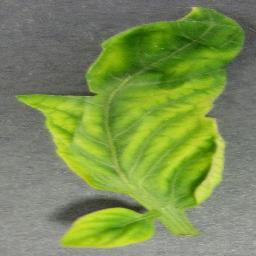

In [ ]:
image_pred = image.load_img('/content/59cbab95-3d4e-40b5-9335-3e0c204c5846___UF.GRC_YLCV_Lab 01748.JPG', target_size=(img_height, img_width))
image_pred

In [ ]:
image_pred = image.img_to_array(image_pred) / 256
image_pred = np.expand_dims(image_pred, axis=0)

In [ ]:
result = model.predict_classes(image_pred)
result

array([7])